## Problem Statement:
Dream Housing Finance company deals in all home loans. They have a presence across all urban, semi-urban, and rural areas. Customer-first applies for a home loan after that company validates the customer eligibility for a loan.

The company wants to automate the loan eligibility process (real-time) based on customer detail provided while filling the online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History, and others. To automate this process, they have given a problem to identify the customer's segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

Steps are:

1. Gathering Data

2. Feature Engineering

3. Data Cleaning

4. Exploratory Data Analysis

5. Data Preprocessing

6. Machine Learning Model Decision.

7. Hyperparameter turning

8. Model Evalution






* loan_id -------------->Unique loan ID

* no_of_dependents-------------->Number of dependents of the applicant

* education-------------->Education level of the applicant

* self_employed-------------->If the applicant is self-employed or not

* income_annum-------------->Annual income of the applicant

* loan_amount-------------->Loan amount requested by the applicant

* loan_tenure-------------->Tenure of the loan requested by the applicant (in Years)

* cibil_score-------------->CIBIL score of the applicant

* residential_asset_value-------------->Value of the residential asset of the
   applicant

* commercial_asset_value-------------->Value of the commercial asset of the
   applicant

* luxury_asset_value-------------->Value of the luxury asset of the applicant

* bank_assets_value-------------->Value of the bank asset of the applicant

* loan_status-------------->Status of the loan (Approved/Rejected)

# Importing Library

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df= pd.read_csv('/content/loan_approval_dataset.csv')

In [ ]:
df.sample(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved
628,629,2,Not Graduate,Yes,4500000,12500000,12,418,400000,4300000,12400000,4300000,Rejected
66,67,3,Not Graduate,No,8300000,29100000,10,715,6100000,11900000,24100000,11900000,Approved
2764,2765,1,Not Graduate,No,2600000,7700000,6,399,3700000,4300000,8900000,3500000,Rejected
3025,3026,4,Not Graduate,Yes,6000000,13200000,6,455,7300000,5900000,16500000,7100000,Rejected
3714,3715,2,Graduate,No,2900000,10500000,20,708,4200000,600000,7700000,4300000,Approved
1130,1131,1,Not Graduate,No,300000,1200000,4,342,800000,100000,1100000,200000,Approved
2351,2352,1,Graduate,No,9100000,26200000,8,727,20800000,7100000,27800000,8900000,Approved
2855,2856,0,Graduate,No,9400000,28300000,20,761,22500000,14800000,30800000,10100000,Approved
830,831,0,Graduate,No,7300000,14500000,16,811,1000000,12400000,16100000,9600000,Approved


# Feature Engineering

In [ ]:
columns_to_remove = ['loan_id']

# Remove the specified columns
df.drop(columns=columns_to_remove, inplace=True)

In [ ]:
# Display the shape of the dataset (rows, columns) of Train dataset
print("Dataset Shape:", df.shape)

Dataset Shape: (4269, 12)


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0    no_of_dependents          4269 non-null   int64 
 1    education                 4269 non-null   object
 2    self_employed             4269 non-null   object
 3    income_annum              4269 non-null   int64 
 4    loan_amount               4269 non-null   int64 
 5    loan_term                 4269 non-null   int64 
 6    cibil_score               4269 non-null   int64 
 7    residential_assets_value  4269 non-null   int64 
 8    commercial_assets_value   4269 non-null   int64 
 9    luxury_assets_value       4269 non-null   int64 
 10   bank_asset_value          4269 non-null   int64 
 11   loan_status               4269 non-null   object
dtypes: int64(9), object(3)
memory usage: 400.3+ KB


In [ ]:
# Movable Assets
df['Movable_assets'] = df[' bank_asset_value'] + df[' luxury_assets_value']

#Immovable Assets
df['Immovable_assets'] = df[' residential_assets_value'] + df[' commercial_assets_value']

In [ ]:
# Drop columns
df.drop(columns=[' bank_asset_value',' luxury_assets_value', ' residential_assets_value', ' commercial_assets_value' ], inplace=True)

In [ ]:
def uniquevals(col):
    print(f'Unique Values in {col} is : {df[col].unique()}')

def valuecounts(col):
    print(f'Valuecounts of {col} is: {len(df[col].value_counts())}')




for col in df.columns:
    valuecounts(col)
#     uniquevals(col)
    print("-"*75)

Valuecounts of  no_of_dependents is: 6
---------------------------------------------------------------------------
Valuecounts of  education is: 2
---------------------------------------------------------------------------
Valuecounts of  self_employed is: 2
---------------------------------------------------------------------------
Valuecounts of  income_annum is: 98
---------------------------------------------------------------------------
Valuecounts of  loan_amount is: 378
---------------------------------------------------------------------------
Valuecounts of  loan_term is: 10
---------------------------------------------------------------------------
Valuecounts of  cibil_score is: 601
---------------------------------------------------------------------------
Valuecounts of  loan_status is: 2
---------------------------------------------------------------------------
Valuecounts of Movable_assets is: 484
------------------------------------------------------------------------

In [ ]:
# select all categorical data type and stored in one dataframe and select all other numarical and stored in one data frame
catvars = df.select_dtypes(include=['object']).columns
numvars = df.select_dtypes(include = ['int32','int64','float32','float64']).columns

catvars,numvars

(Index([' education', ' self_employed', ' loan_status'], dtype='object'),
 Index([' no_of_dependents', ' income_annum', ' loan_amount', ' loan_term',
        ' cibil_score', 'Movable_assets', 'Immovable_assets'],
       dtype='object'))

# Data Cleaning

In [ ]:
import missingno as msno
import warnings
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

<Axes: >

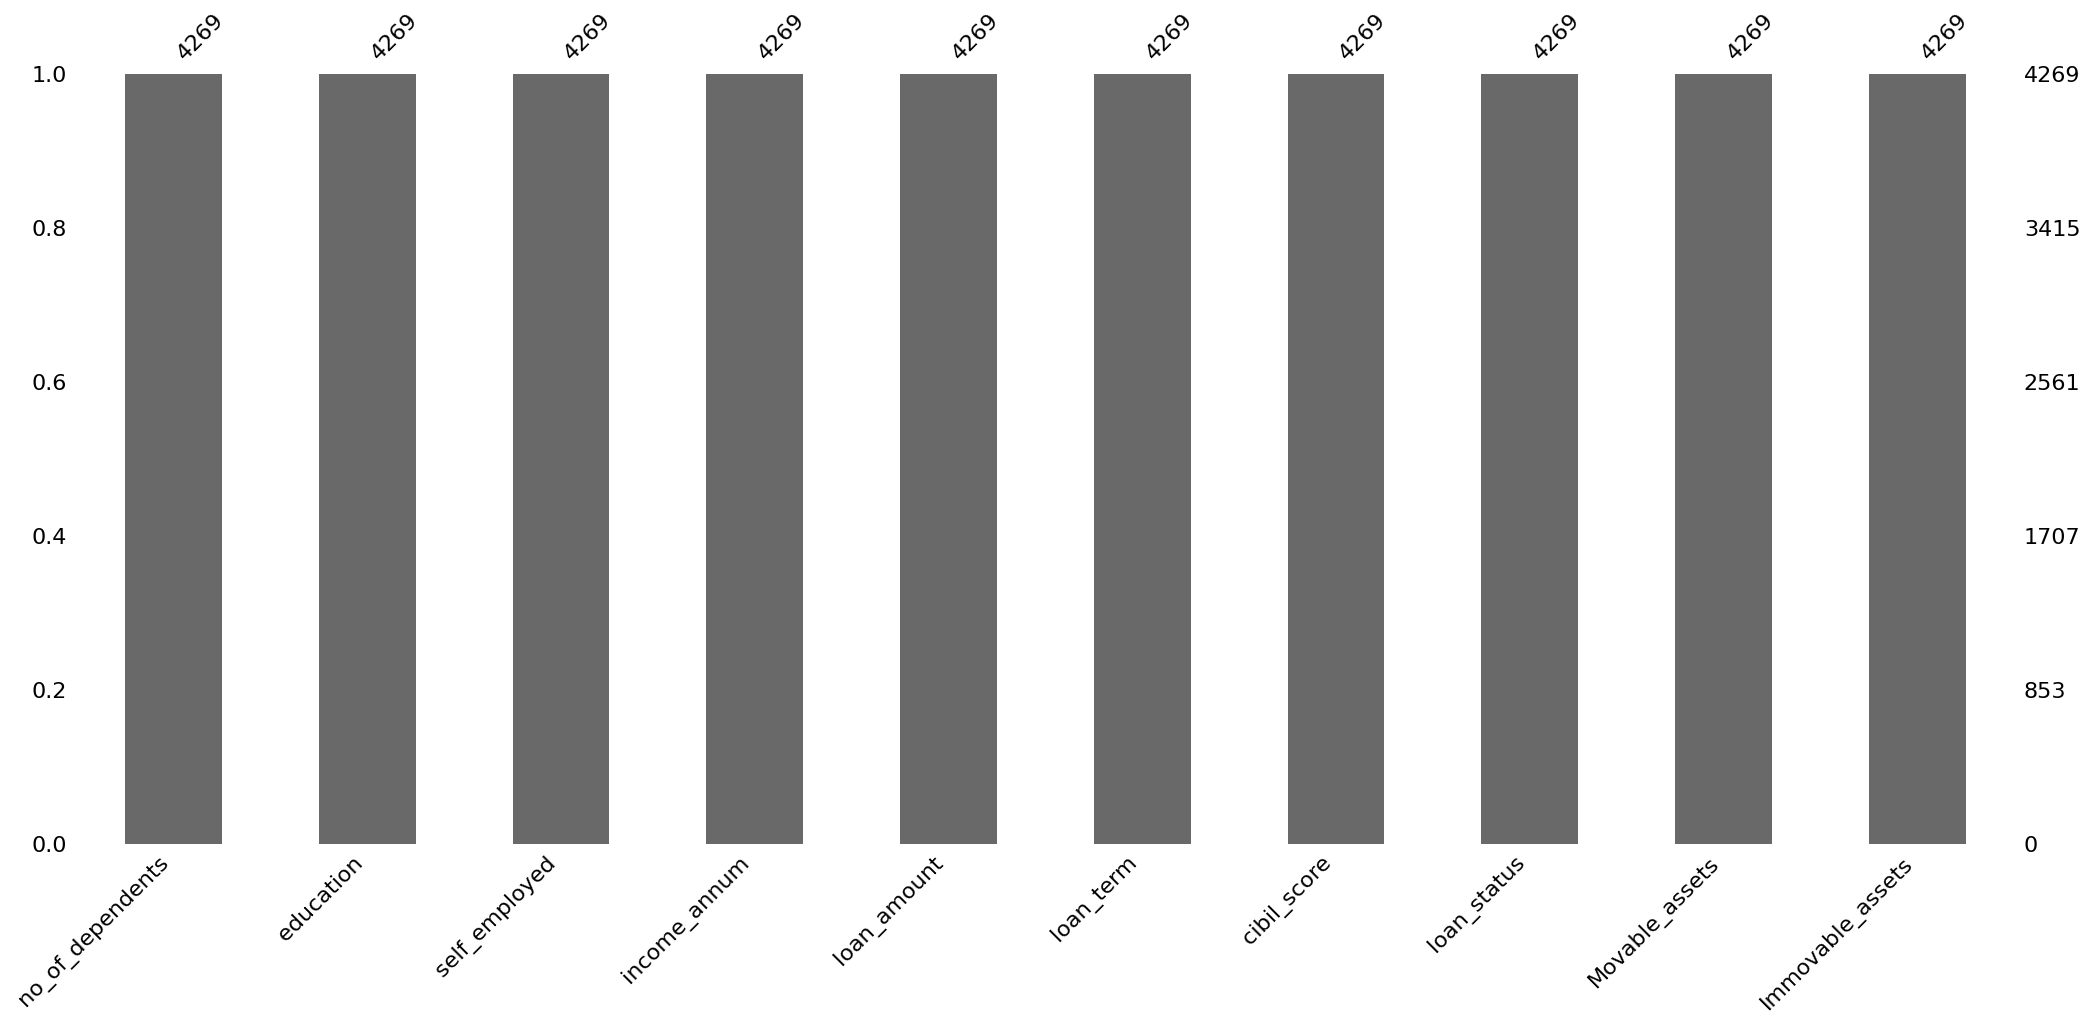

In [ ]:
msno.bar(df)

In [ ]:
'''
so on observation we can see that the null value is not present in Loan Approval Data Set dataset , as shown ↓
'''
print()
df.isna().sum()

 no_of_dependents    0
 education           0
 self_employed       0
 income_annum        0
 loan_amount         0
 loan_term           0
 cibil_score         0
 loan_status         0
Movable_assets       0
Immovable_assets     0
dtype: int64

In [ ]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,Movable_assets,Immovable_assets
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,2.010300e+07,1.244577e+07
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,1.183658e+07,9.232541e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,3.000000e+05,-1.000000e+05
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,1.000000e+07,4.900000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,1.960000e+07,1.060000e+07
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,2.910000e+07,1.820000e+07
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,5.380000e+07,4.660000e+07


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0    no_of_dependents  4269 non-null   int64 
 1    education         4269 non-null   object
 2    self_employed     4269 non-null   object
 3    income_annum      4269 non-null   int64 
 4    loan_amount       4269 non-null   int64 
 5    loan_term         4269 non-null   int64 
 6    cibil_score       4269 non-null   int64 
 7    loan_status       4269 non-null   object
 8   Movable_assets     4269 non-null   int64 
 9   Immovable_assets   4269 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 333.6+ KB


# Exploratory Data Analysis

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
# sns.set_style('dark')

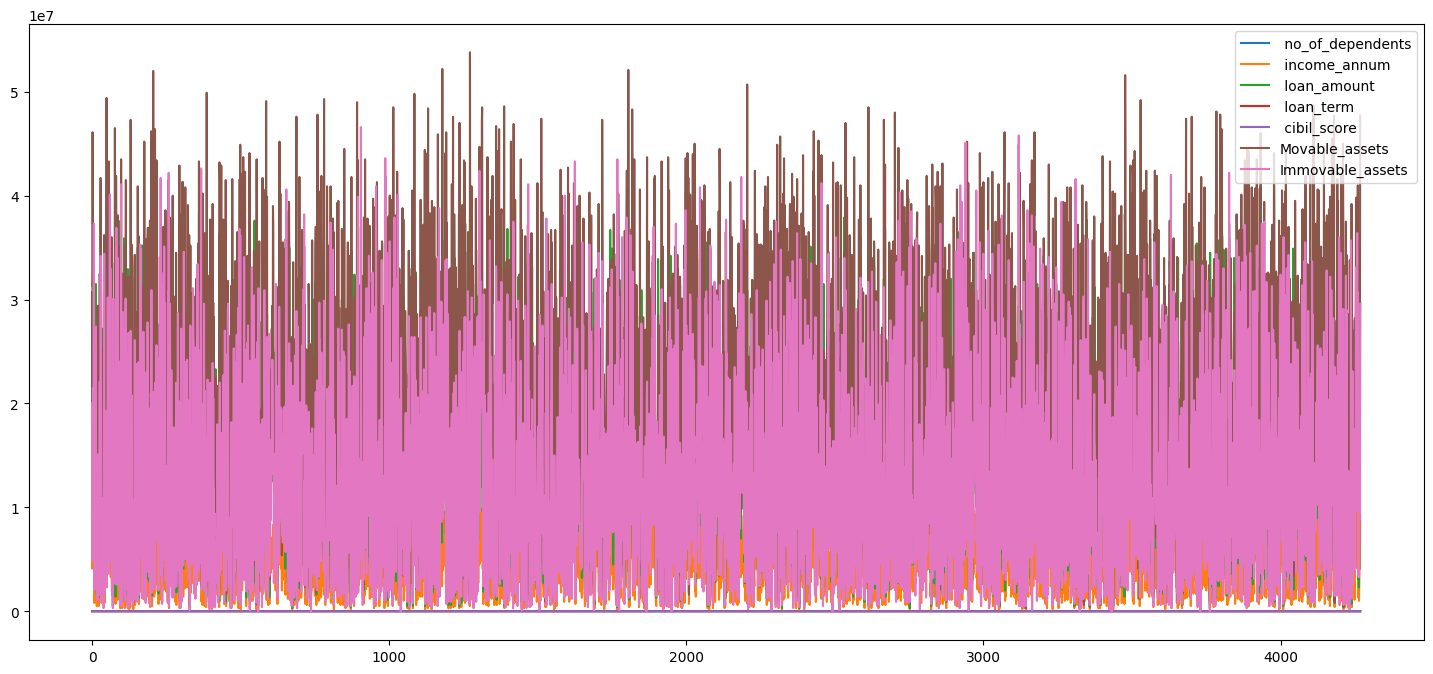

In [ ]:
df.plot(figsize=(18, 8))

plt.show()

#Number Of Dependents Distribution

Text(0.5, 1.0, 'Number of Dependents')

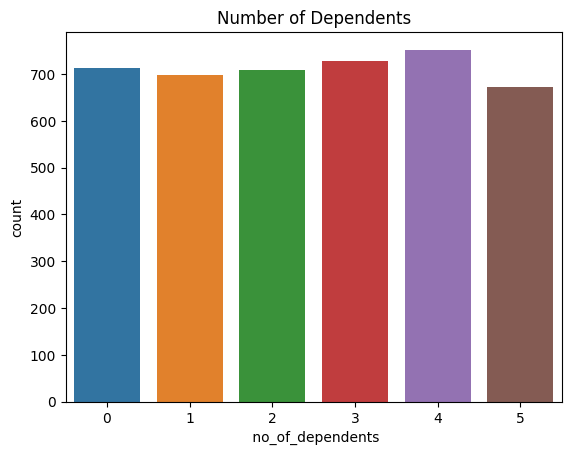

In [ ]:
sns.countplot(x = ' no_of_dependents', data = df).set_title('Number of Dependents')

**The graph illustrates the number of dependent individuals associated with loan applicants, revealing a stark contrast in living arrangements. There is not much difference in the number of dependents,Since the number of dependents increases the disposable income of the applicant decreases. So I assume that that the number of applicants with 0 or 1 dependent will have higher chances of loan approval.**

#Number of Dependants Vs Loan Status

<Axes: xlabel=' no_of_dependents', ylabel='count'>

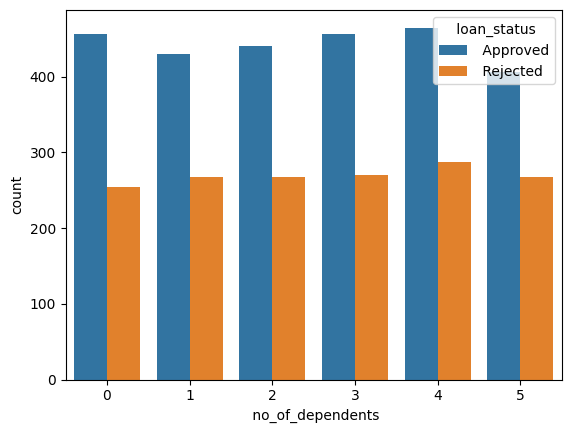

In [ ]:
sns.countplot(x = ' no_of_dependents', data = df, hue = ' loan_status')

**The graph tells us that when someone has more family members they take care of, their chances of loan rejection go up. But what's interesting is that the number of people who get loans approved doesn't change much, even if they have more family members. This means my guess that loans might be approved less often for people with more family members isn't really right, based on this graph. It shows that sometimes what we think might not match what actually happens.**

#Education and Self Employed

Text(0.5, 1.0, 'Self Employed')

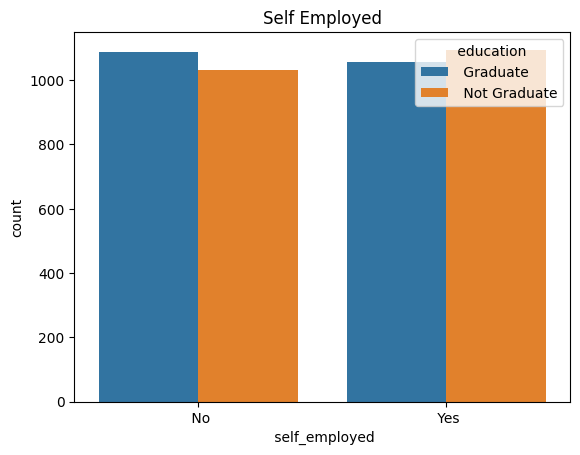

In [ ]:
sns.countplot(x=' self_employed', data = df, hue = ' education').set_title('Self Employed')

**The graph depicting the relationship between the employment status of applicants and their education levels highlights important trends for loan approval considerations. It reveals that a majority of non-graduate applicants are self-employed, while most graduate applicants are not self-employed. This indicates that graduates are more likely to be employed in salaried positions, whereas non-graduates tend to be self-employed. This distinction has implications for loan approval decisions. Graduates' propensity for stable salaried employment suggests a more predictable income source, potentially enhancing their ability to repay loans. Conversely, self-employed non-graduates might have more fluctuating incomes, posing challenges for consistent loan repayment. However, it's important to note that self-employed individuals among non-graduates might also have the potential to earn higher incomes, potentially counteracting income volatility concerns. Considering this interplay between education, employment status, and potential income variability is crucial when predicting loan approval outcomes. A comprehensive assessment of these factors is necessary to accurately gauge applicants' financial capabilities and repayment potential. The graph underscores the complexity of these considerations and the need for a holistic approach in evaluating loan applicants.**

# Education and Income

<Axes: xlabel=' education', ylabel=' income_annum'>

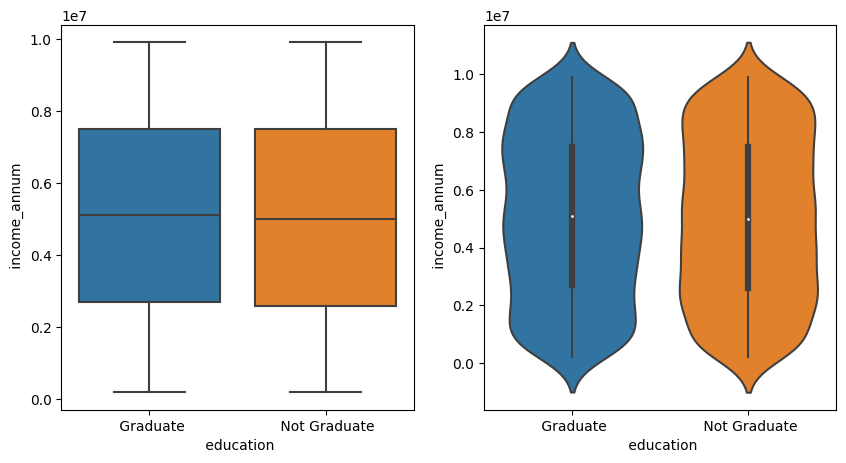

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.boxplot(x = ' education', y = ' income_annum', data = df, ax=ax[0])
sns.violinplot(x = ' education', y = ' income_annum', data = df, ax=ax[1])

**The combination of boxplot and violinplot visualizations provides insights into the relationship between education levels of loan applicants and their annual incomes. The boxplot reveals that both graduates and non-graduates have similar median incomes, indicating that having a degree doesn't necessarily lead to a significant income advantage. Moreover the violinplot shows the distribution of income among the graduates and non graduate applicants, where we can see that non graduate applicants have a even distribution between income 2000000 and 8000000 , whereas there is a uneven distribution among the graduates with more applicants having income between 6000000 and 8000000 Since there is not much change in annual income of graduates and non graduates, I assume that education does not play a major role in the approval of loan.**

# Education Vs Loan Status


Text(0.5, 1.0, 'Loan Status by Education')

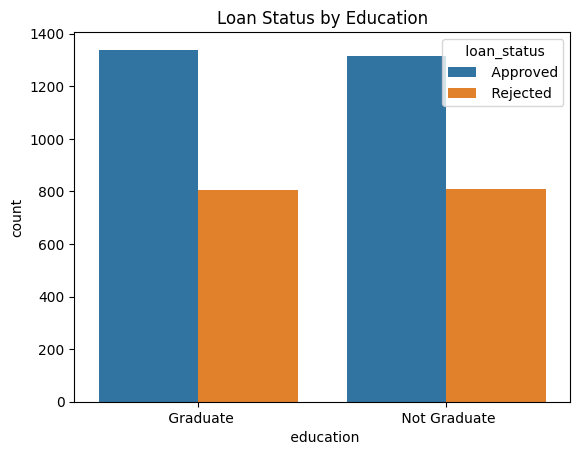

In [ ]:
sns.countplot(x = ' education', hue = ' loan_status', data = df).set_title('Loan Status by Education')

**The graph indicates that there's only a small difference between the number of loans approved and rejected for both graduate and non-graduate applicants. This difference is so small that it doesn't seem to be significant.**

# Loan_Amount And Terms

1.   List item
2.   List item



Text(0.5, 1.0, 'Loan Amount vs. Loan Term')

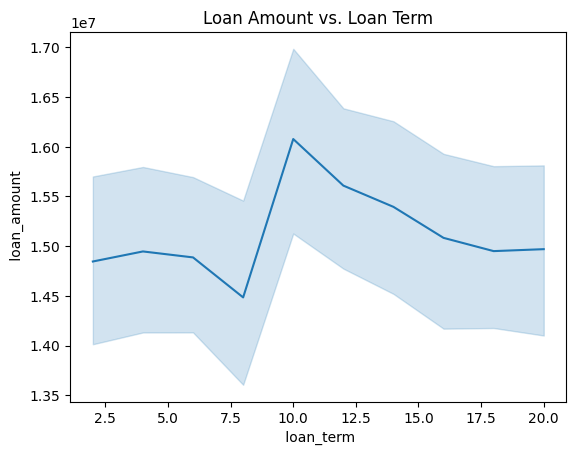

In [ ]:
sns.lineplot(x = ' loan_term', y = ' loan_amount', data = df).set_title('Loan Amount vs. Loan Term')

**This line plot shows the trend between the loan amount and the loan tenure. Between the loan tenure of 2.5 - 7.5years the loan amount is between 1400000 - 15500000. However the loan amount is significantly higher for the loan tenure of 10 years.**

In [ ]:
df.head(5)

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


#Loan Amount and Loan Status

<Axes: xlabel=' loan_status', ylabel=' loan_amount'>

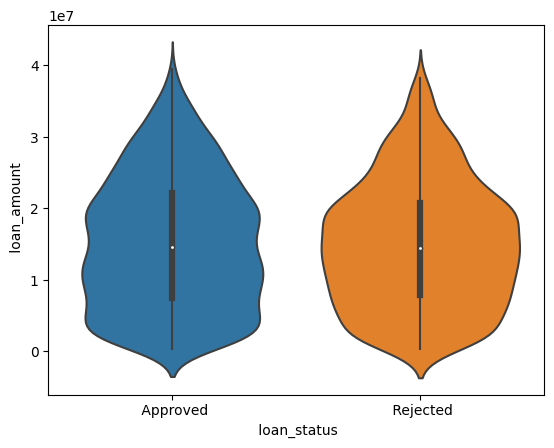

In [ ]:
sns.violinplot(x=' loan_status', y=' loan_amount', data=df)

#Loan amount & tenure Vs Loan Status

<Axes: xlabel=' loan_term', ylabel=' loan_amount'>

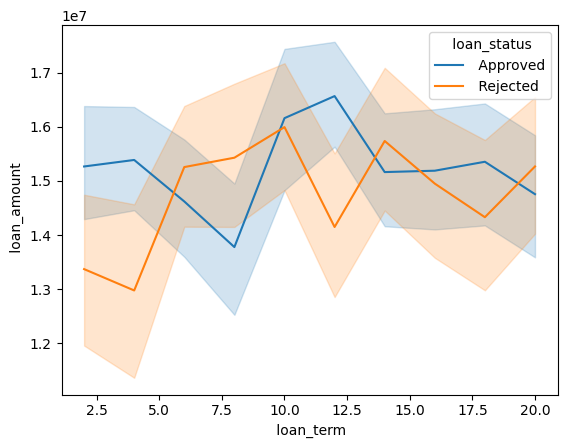

In [ ]:
sns.lineplot(x=' loan_term', y=' loan_amount', data=df, hue=' loan_status')

**The graph shows how loan amount, the time to repay, and loan approval are connected. It's clear that loans that are accepted often have higher amounts and shorter repayment times. On the other hand, loans that are rejected are usually for lower amounts and longer repayment periods. This could be because the bank prefers to approve loans that are easier to pay back quickly and that bring in more profit. They might not want to deal with very small loans due to the costs involved. However, other things like how reliable the person borrowing is with money also matter in these decisions. The graph gives us a glimpse into how banks think when they decide to approve or reject loans.**

##CIBIL Score Distribution

Before looking at the cibil score, lets have a look at the cibil score ranges and their meaning.

In [ ]:
begin{array}{|c|c|} \hline
CIBIL & Meaning \\ \hline
300-549 & Poor  \\
550-649 & Fair  \\
650-749 & Good  \\
750-799 & Very Good  \\
800-900 & Excellent \\ \hline
\end{array}

SyntaxError: ignored

<Axes: xlabel=' cibil_score', ylabel='Count'>

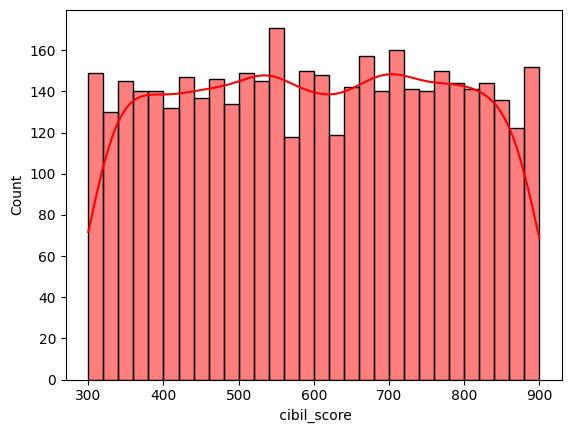

In [ ]:
# viewing the distribution of the cibil_score column
sns.histplot(df[" cibil_score"],bins=30, kde=True, color='red')

**Looking at the table, most customers have low CIBIL scores (below 649), which could make it hard for them to get loans approved. But there's a good number of customers with high scores (above 649), which is positive for the bank. The bank can give these high-score customers special treatment like good deals and offers to get them interested in taking loans from the bank. Based on this, we can guess that people with high CIBIL scores are more likely to get their loans approved. This is because higher scores usually mean they are better with money. Overall, the bank can use this information to make decisions that help both the bank and its customers.**

# CIBIL Score Vs Loan Status

<Axes: xlabel=' loan_status', ylabel=' cibil_score'>

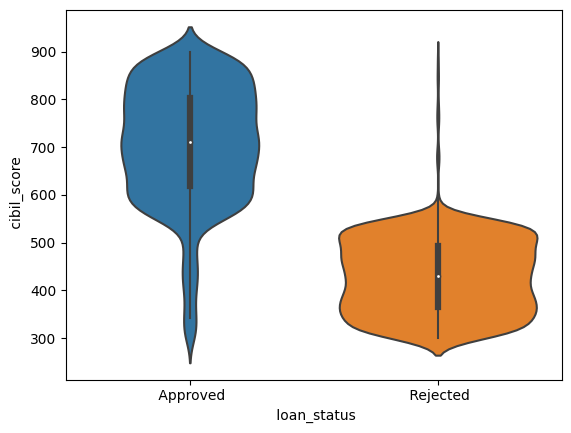

In [ ]:
sns.violinplot(x=' loan_status', y=' cibil_score', data=df)

**The graph with the shapes (violinplot) shows that people who got their loans approved tend to have higher CIBIL scores, mostly above 600. But for those whose loans weren't approved, the scores are more spread out and usually lower than 550. This means having a higher CIBIL score, especially over 600, really boosts the chances of getting a loan approved. It's clear that a good CIBIL score is important for loan approval.**

#Asset Distribution

Text(0.5, 1.0, 'Immovable_assets ')

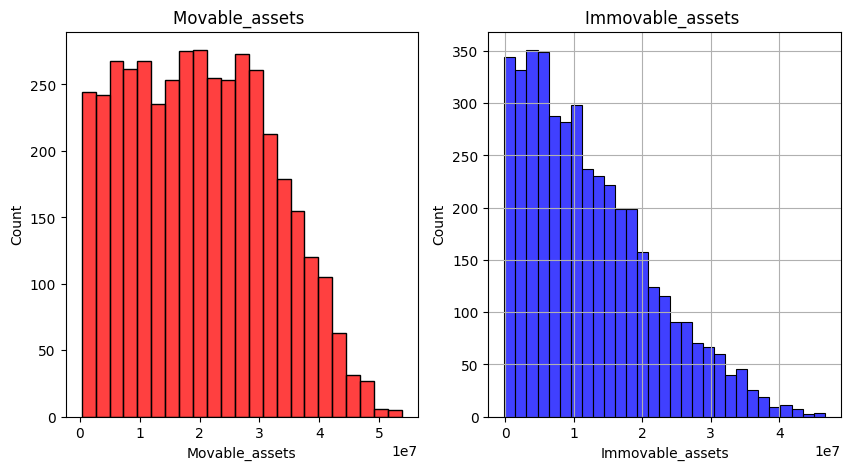

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
plt.subplot(1, 2, 1)
sns.histplot(df['Movable_assets'], ax=ax[0], color='red')
plt.title("Movable_assets ")

plt.subplot(1, 2, 2)
plt.grid()
sns.histplot(df['Immovable_assets'], ax=ax[1], color='blue')
plt.title("Immovable_assets ")

**Assets are really important when asking for a loan because they assure the bank you can pay back. The types are split into movable (like bank accounts and luxury things) and immovable (like homes and businesses). The graphs show how many people have these kinds of assets. For movable assets, most people have less than 30 million, and not many have a lot more. For immovable assets, most have less than 15 million, and the number of people decreases as the value goes over 20 million. In short, these graphs tell us that most people have lower-valued assets, and the number of people with more valuable assets decreases. It helps us understand how assets affect loan decisions.**

# Assets Vs Loan Status

<Axes: xlabel='Immovable_assets', ylabel='Count'>

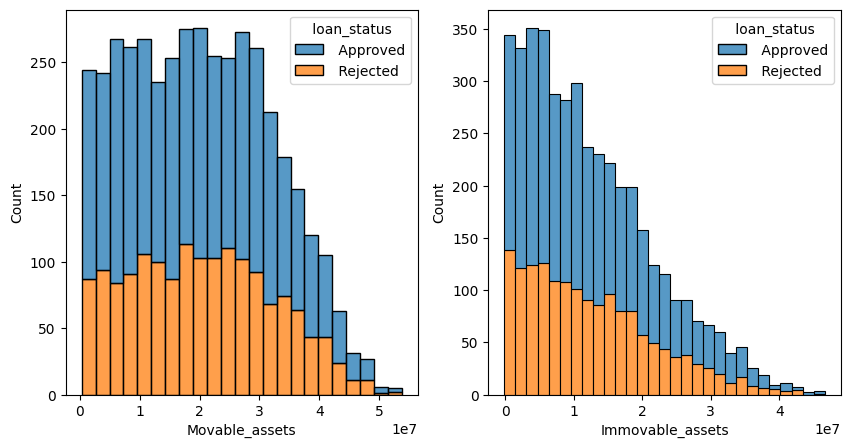

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,5))
sns.histplot(x  = 'Movable_assets', data = df, ax=ax[0], hue = ' loan_status', multiple='stack')
sns.histplot(x =  'Immovable_assets', data = df, ax=ax[1], hue  = ' loan_status', multiple='stack')

**Assets offer a safety net for the bank when giving out loans. These graphs display how movable and immovable assets relate to loan approval. Both graphs indicate that as assets increase, the likelihood of loan approval goes up, and the chances of rejection decrease. Additionally, the graphs highlight that there are more movable assets than immovable ones.**

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,Graduate,No,9600000,29900000,12,778,Approved,30700000,20000000
1,0,Not Graduate,Yes,4100000,12200000,8,417,Rejected,12100000,4900000
2,3,Graduate,No,9100000,29700000,20,506,Rejected,46100000,11600000
3,3,Graduate,No,8200000,30700000,8,467,Rejected,31200000,21500000
4,5,Not Graduate,Yes,9800000,24200000,20,382,Rejected,34400000,20600000


##  Data Preprocessing

Label Encoding the categorical variables

In [ ]:
# Label Encoding
df[' education'] = df[' education'].map({' Not Graduate':0, ' Graduate':1})
df[' self_employed'] = df[' self_employed'].map({' No':0, ' Yes':1})
df[' loan_status'] = df[' loan_status'].map({' Rejected':0, ' Approved':1})

In [ ]:
df.head()

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,loan_status,Movable_assets,Immovable_assets
0,2,1,0,9600000,29900000,12,778,1,30700000,20000000
1,0,0,1,4100000,12200000,8,417,0,12100000,4900000
2,3,1,0,9100000,29700000,20,506,0,46100000,11600000
3,3,1,0,8200000,30700000,8,467,0,31200000,21500000
4,5,0,1,9800000,24200000,20,382,0,34400000,20600000


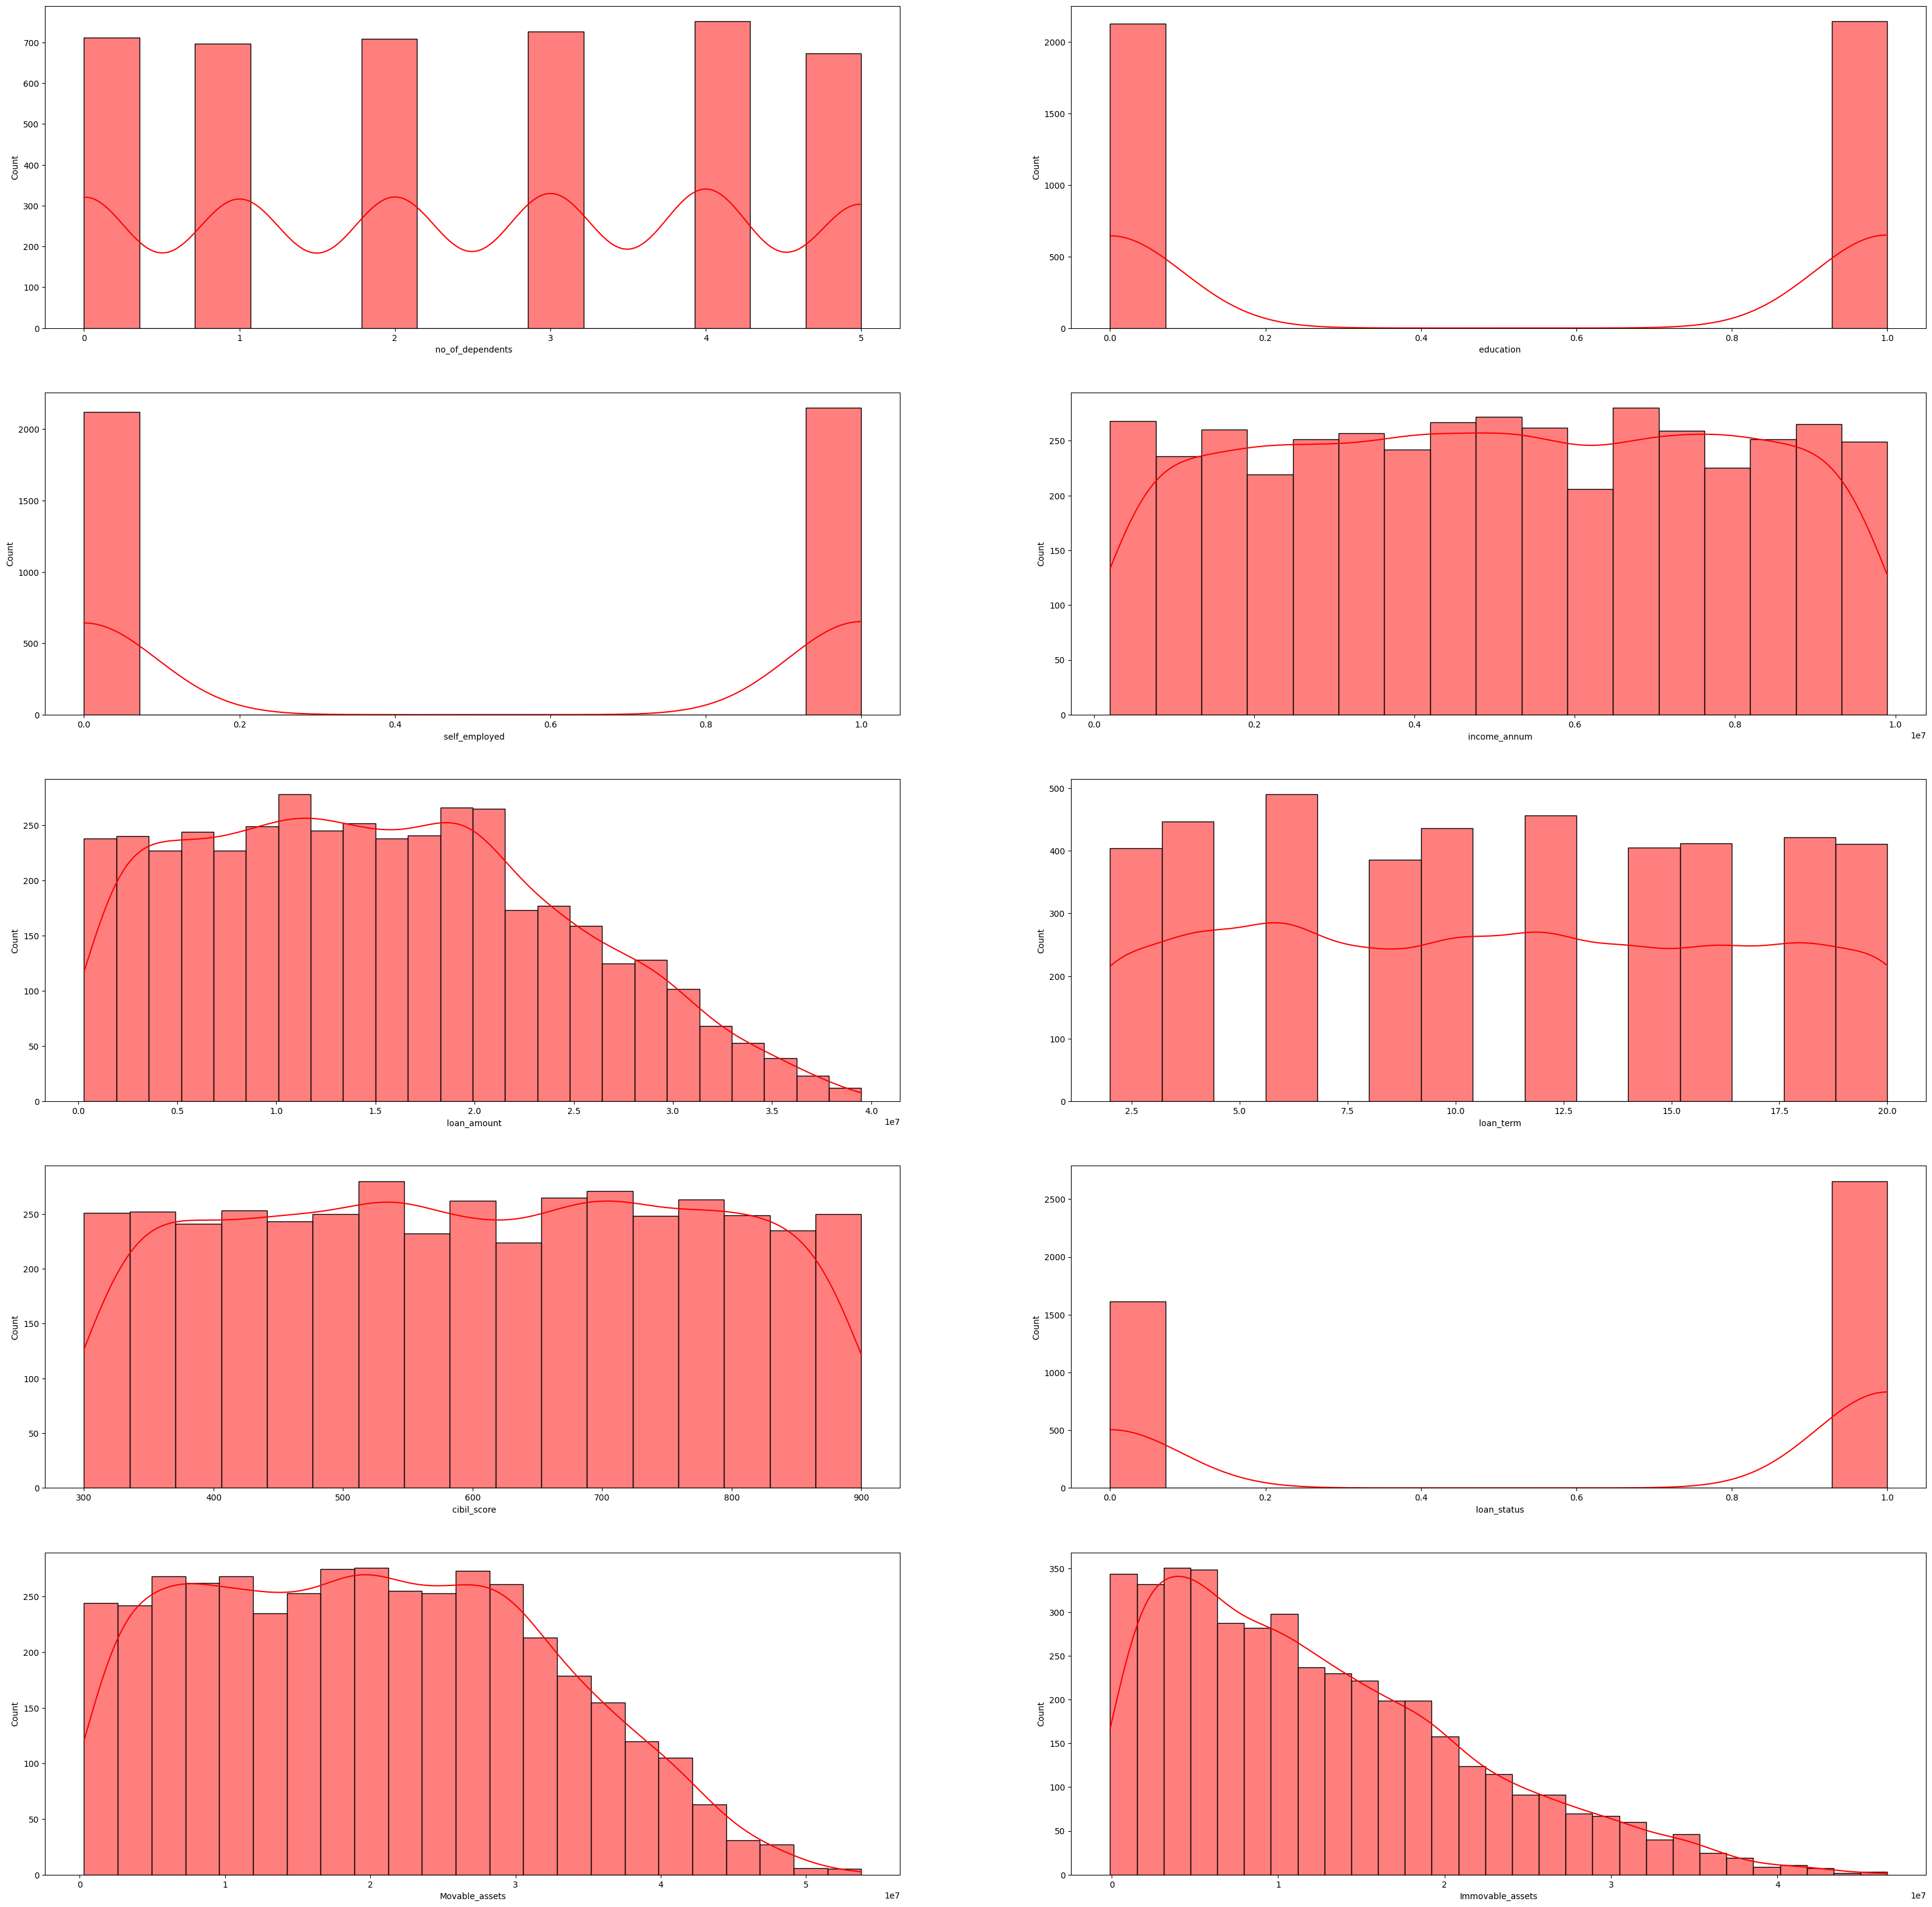

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
    sns.histplot(df[col],kde=True, color='red', ax = ax)

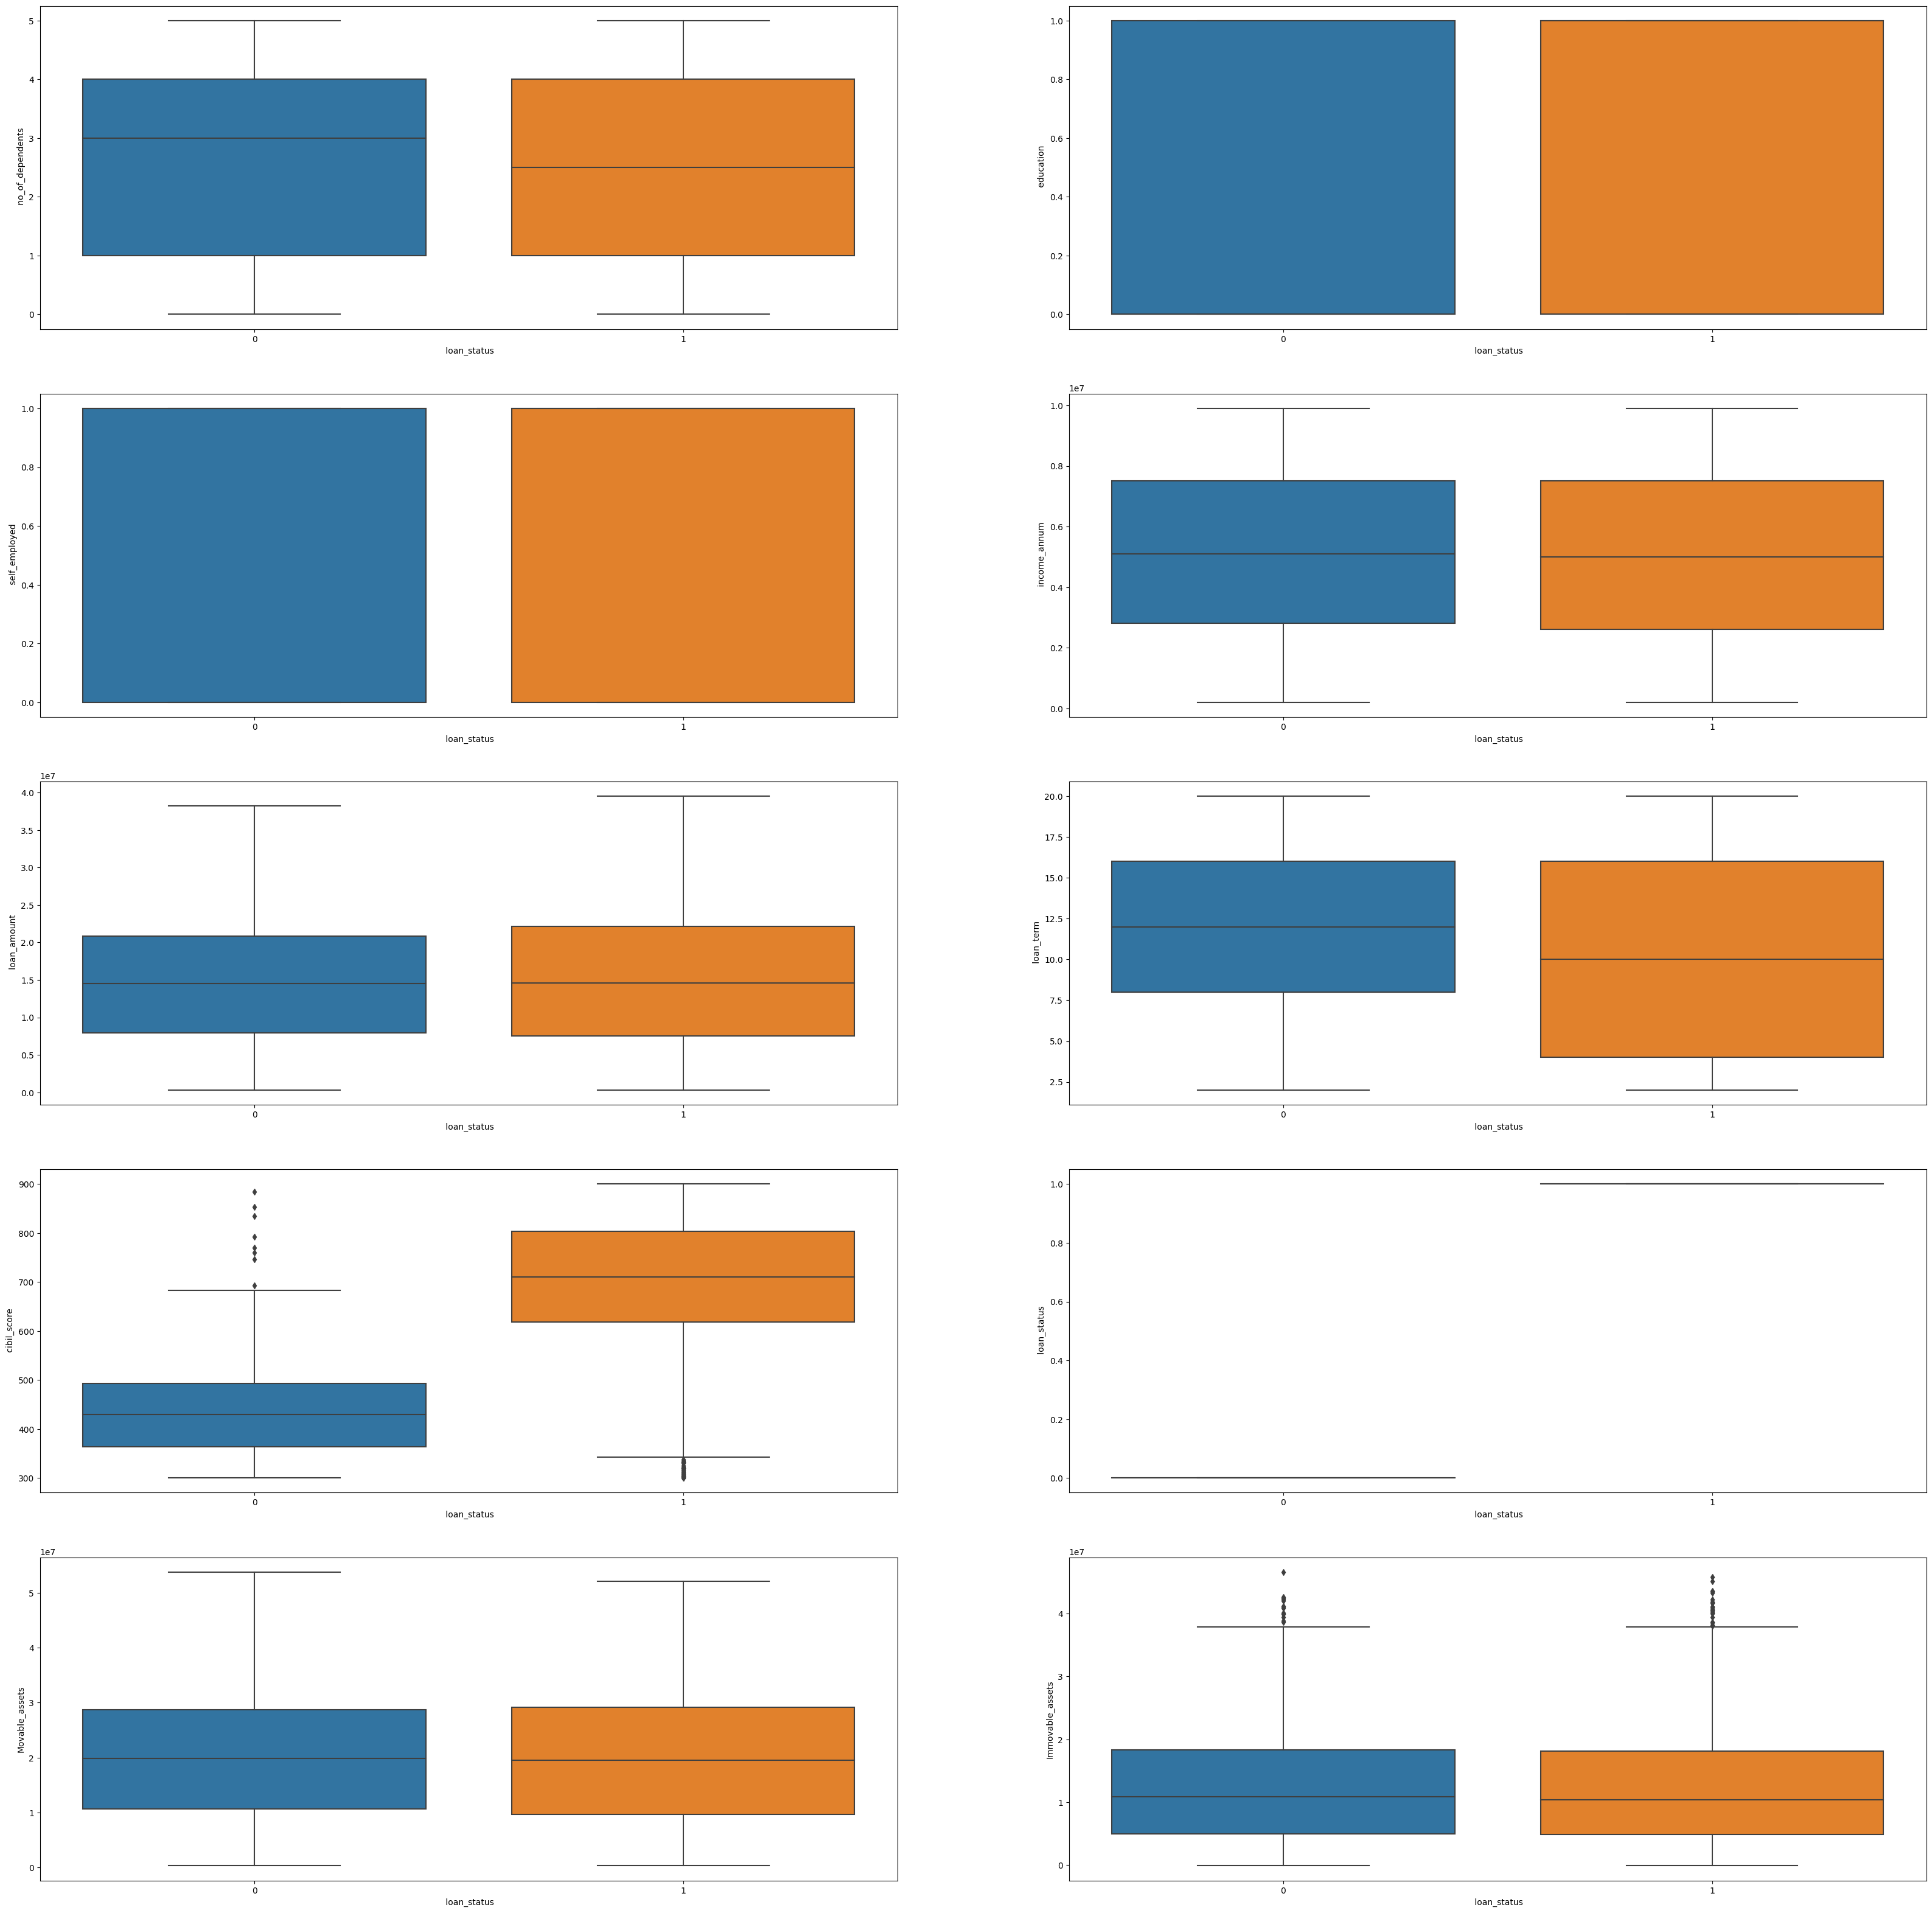

In [ ]:
fig, axes = plt.subplots(nrows = 5, ncols = 2)
axes = axes.flatten()
fig.set_size_inches(40,40)

for ax, col in zip(axes, df.columns):
  sns.boxplot(x=' loan_status',y=df[col], ax = ax , data=df)

In [ ]:
import warnings

# Suppress warnings within this code block
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

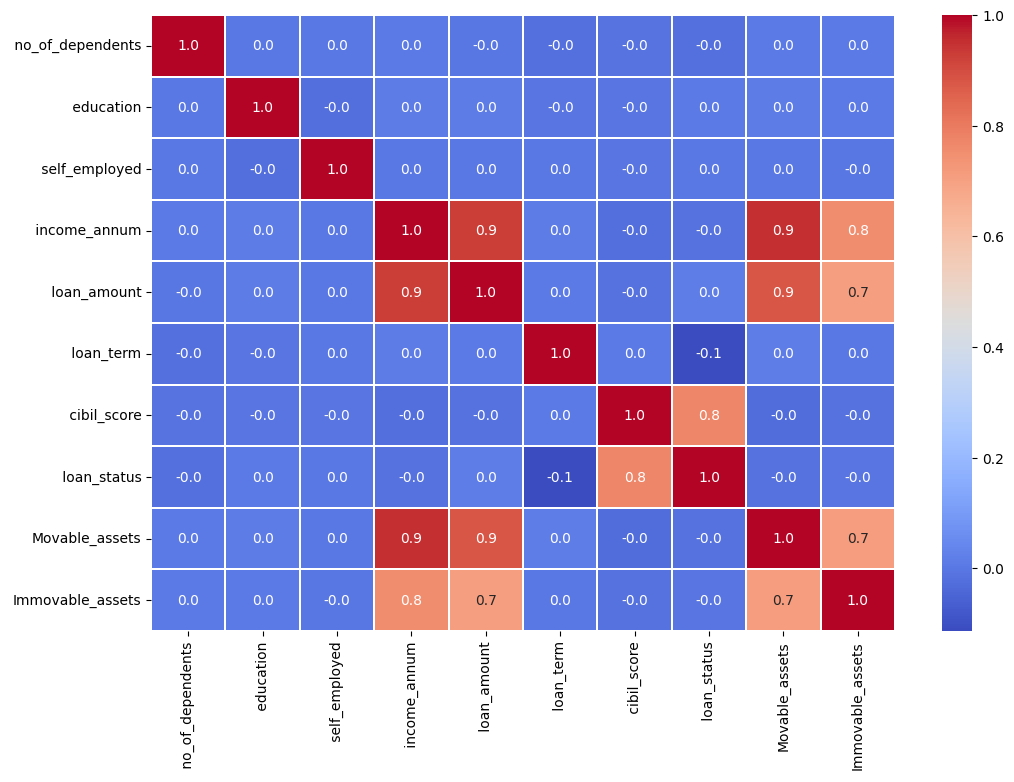

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=True, fmt='.1f', linewidths=.1)
plt.show()

In [ ]:
df.corr()[' loan_status']

 no_of_dependents   -0.018114
 education           0.004918
 self_employed       0.000345
 income_annum       -0.015189
 loan_amount         0.016150
 loan_term          -0.113036
 cibil_score         0.770518
 loan_status         1.000000
Movable_assets      -0.013755
Immovable_assets    -0.006200
Name:  loan_status, dtype: float64

The heatmap of correlation values shows several strong connections:

Movable Assets and Immovable Assets

Income and Movable Assets

Income and Immovable Assets

Movable Assets and Loan Amount

Immovable Assets and Loan Amount

Loan Status and Cibil Score

Loan Amount and Income

# Assets Vs Loan Amount

Text(0.5, 1.0, 'Immovable_assets vs loan_amount')

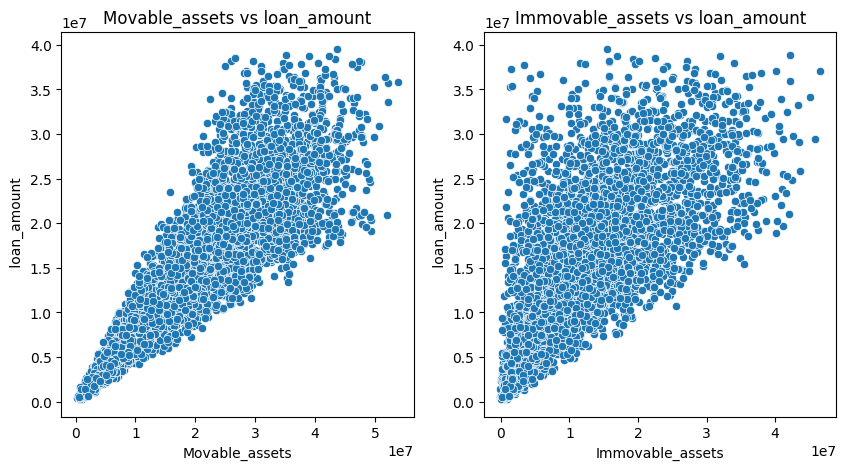

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10, 5))
sns.scatterplot(x='Movable_assets', y = ' loan_amount', data = df, ax=ax[0]).set_title('Movable_assets vs loan_amount')
sns.scatterplot(x='Immovable_assets', y = ' loan_amount', data = df, ax=ax[1]).set_title('Immovable_assets vs loan_amount')

**There is a positive relationship between the loan amount and both movable and immovable assets. When a person has more assets, whether movable (like money) or immovable (like property), the bank tends to offer a higher loan amount. In other words, having more assets increases the likelihood of getting a larger loan from the bank.**

#Loan Amount Vs Income

<Axes: xlabel=' income_annum', ylabel=' loan_amount'>

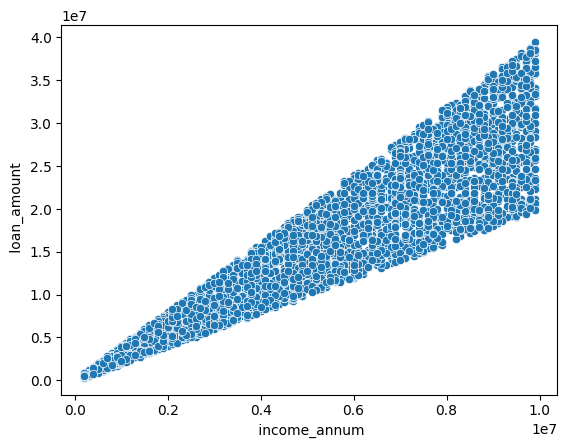

In [ ]:
sns.scatterplot(x=' income_annum', y = ' loan_amount', data = df)

**The loan amount and the applicant's annual income share a straightforward connection. When the income is higher, the loan amount tends to be higher as well. This is because the applicant's income plays a major role in determining the appropriate loan amount they can afford to repay.**

## Machine Learning Model Decision

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.compose import ColumnTransformer
from sklearn import tree

### Train Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(' loan_status', axis=1), df[' loan_status'], test_size=0.2, random_state=42)

##Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lgr = LogisticRegression()

lgr.fit(X_train, y_train)

predictions = lgr.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


##Support Vector Classification (SVC)

In [ ]:
from sklearn.svm import SVC
model = SVC()

model.fit(X_train, y_train)

predictions = model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6276346604215457


##Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Create decision tree object
dtree = DecisionTreeClassifier()

In [ ]:
# Trainign the model using the training data
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
dtree_pred = dtree.predict(X_test)

In [ ]:
# Training Accuracy
dtree.score(X_train, y_train)


1.0

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, dtree_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9812646370023419


##Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rfc = RandomForestClassifier()

In [ ]:
# Training the model using the training data
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Predicting the Loan Approval Status
rfc_pred = rfc.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, rfc_pred)
print("Accuracy:", accuracy)

Accuracy: 0.977751756440281


Text(518.4494949494949, 0.5, 'Actual')

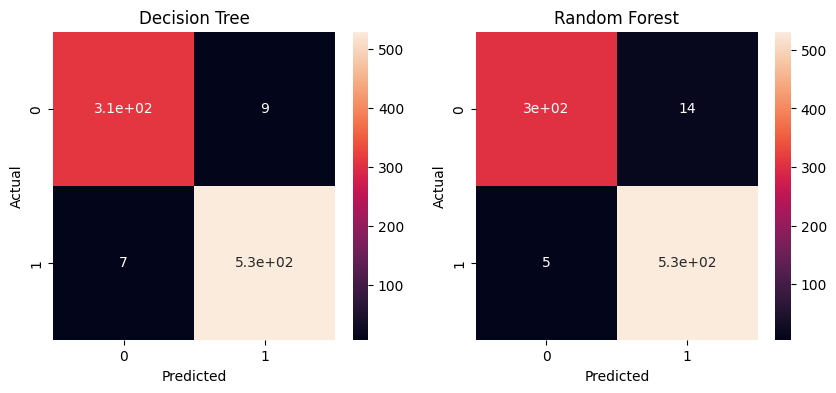

In [ ]:
Accuracy: 0.9812646370023419
from sklearn.metrics import confusion_matrix

fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, dtree_pred), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, rfc_pred), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

## Conclusion

**Summary of Model Performance for Loan Approval Prediction**

When looking at different ways to predict if loans will be approved or not, we found that the Decision Tree model worked really well. It was accurate and could predict outcomes quite accurately. The Random Forest model also did a good job.

However, the models called Support Vector Machine (SVM) and Logistic Regression didn't work well for this dataset. They didn't predict as accurately as the Decision Tree and Random Forest models.

This tells us that picking the right model is really important. The Decision Tree and Random Forest models were great for this data, but SVM and Logistic Regression weren't a good fit.



## Hyperparameter turning

In [ ]:
import warnings
import numpy as np
warnings.filterwarnings("ignore", category=UserWarning, message="A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy")


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
rfc=RandomForestClassifier()
rf_Grid=GridSearchCV(estimator=rfc,param_grid=param_grid,cv=3,verbose=0,n_jobs=-1,return_train_score=False)
rf_Grid.fit(X_train,y_train)
rf_Grid.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf=RandomForestClassifier(**rf_Grid.best_params_)
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
rfc_pred = rf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score , f1_score
import sklearn.metrics as metrics
y_pred1=rf.predict(X_test)
score_rf=accuracy_score(y_test,y_pred1)
score_rf

0.977751756440281

In [ ]:
f1_rf=f1_score(y_pred1,y_test)
f1_rf

0.9823255813953489

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred1)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



##Hyperparameter for Decision Tree

In [ ]:
param_grid = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [ ]:
# Make predictions on the test data
predictions = best_model.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.9789227166276346


In [ ]:
cm = metrics.confusion_matrix(y_test, predictions)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.99      0.98      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
f1_dtree=f1_score(predictions,y_test)
f1_dtree

0.9831775700934579

## **Model Evalution**

##Confusion Matrix

Text(518.4494949494949, 0.5, 'Actual')

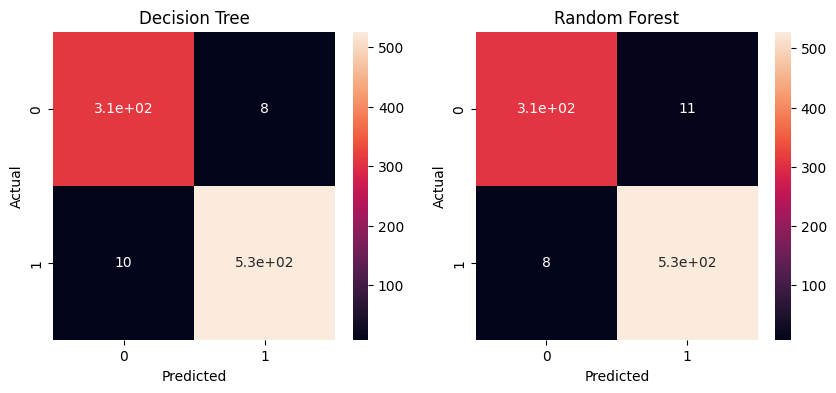

In [ ]:
fig, ax = plt.subplots(1,2,figsize=(10,4))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, ax=ax[0]).set_title('Decision Tree')
ax[0].set_xlabel('Predicted')
ax[0].set_ylabel('Actual')
sns.heatmap(confusion_matrix(y_test, y_pred1), annot=True, ax=ax[1]).set_title('Random Forest')
ax[1].set_xlabel('Predicted')
ax[1].set_ylabel('Actual')

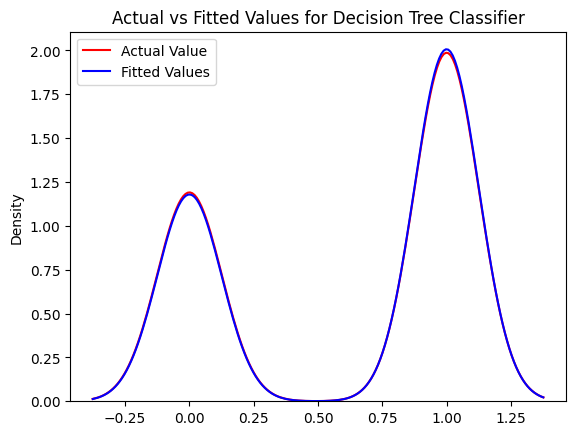

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(dtree_pred, color="b", label="Fitted Values", ax=ax)
ax.set_title('Actual vs Fitted Values for Decision Tree Classifier')
ax.legend()

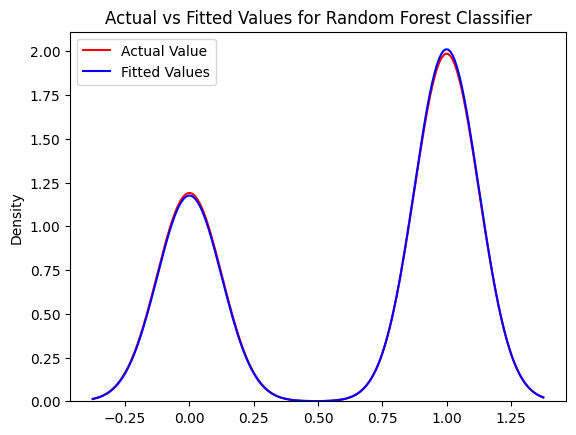

In [ ]:
fig, ax = plt.subplots()
sns.kdeplot(predictions, color="r", label="Actual Value", ax=ax)
sns.kdeplot(y_pred1, color="b", label="Fitted Values", ax=ax)
ax.set_title('Actual vs Fitted Values for Random Forest Classifier')
ax.legend()

## **Classification Report**

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test, dtree_pred))
print(classification_report(y_test, rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       318
           1       0.98      0.99      0.98       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [ ]:
f1_dtree=f1_score(dtree_pred,y_test)
f1_dtree

0.9851024208566108

In [ ]:
f1_rfc=f1_score(rfc_pred,y_test)
f1_rfc

0.9823255813953489

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Decision Tree Classifier
print('R2 score: ', r2_score(y_test, dtree_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, dtree_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, dtree_pred))
print('F1 SCORE of Decision Tree is',f1_dtree)
print('\n')
# Random Forest Classifier
print('R2 score: ', r2_score(y_test, rfc_pred))
print('Mean Squared Error: ', mean_squared_error(y_test, rfc_pred))
print('Mean Absolute Error: ', mean_absolute_error(y_test, rfc_pred))
print('F1 SCORE of Random Forest is',f1_rfc)

R2 score:  0.9198347883225382
Mean Squared Error:  0.01873536299765808
Mean Absolute Error:  0.01873536299765808
F1 SCORE of Decision Tree is 0.9851024208566108


R2 score:  0.9048038111330141
Mean Squared Error:  0.02224824355971897
Mean Absolute Error:  0.02224824355971897
F1 SCORE of Random Forest is 0.9823255813953489


## **Conclusion**

In conclusion, my exploration into machine learning models involved the utilization of both the Decision Tree Classifier and the Random Forest Classifier. It is truly remarkable that both models yielded remarkable outcomes, demonstrating their potential to effectively analyze and classify data. The accuracy rates achieved,91.4% for the Decision Tree Classifier and 89.4% for the Random Forest Classifier, underscore the proficiency of these algorithms in making accurate predictions.

In [ ]:
!apt-get install git

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
git is already the newest version (1:2.34.1-1ubuntu1.12).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.


In [ ]:
import os

# Set your GitHub username and email
username = 'https://github.com/Sheel234'
email = 'satyasheel.bhu.stcomp@gmail.com'

In [ ]:
os.system(f'git config --global user.name "{username}"')
os.system(f'git config --global user.email "{email}"')

0

In [ ]:
# Initialize a git repository
!git init

# Add the remote GitHub repository
!git remote add origin https://github.com/Sheel234/Home-Loan-Prediction


Reinitialized existing Git repository in /content/.git/
error: remote origin already exists.


In [ ]:
!git add .


In [ ]:
!git commit -m "Initial commit from Colab"


On branch master
nothing to commit, working tree clean


In [ ]:
!git push -u origin master


fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git push -u origin main


error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/Sheel234/House-Loan-prediction.git'
